### The Normalization types are:
* l1 norm, l2 norm and max norm

In [2]:
# fourth notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import Normalizer, normalize, StandardScaler, scale

In [3]:
driver_df = pd.read_csv("./Datasets/data_1024.csv", delimiter="\t")

driver_df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [6]:
# get just 2 needed features
driver_df = driver_df[["Distance_Feature", "Speeding_Feature"]]

driver_df = driver_df.astype(np.float32)

driver_df.dtypes

Distance_Feature    float32
Speeding_Feature    float32
dtype: object

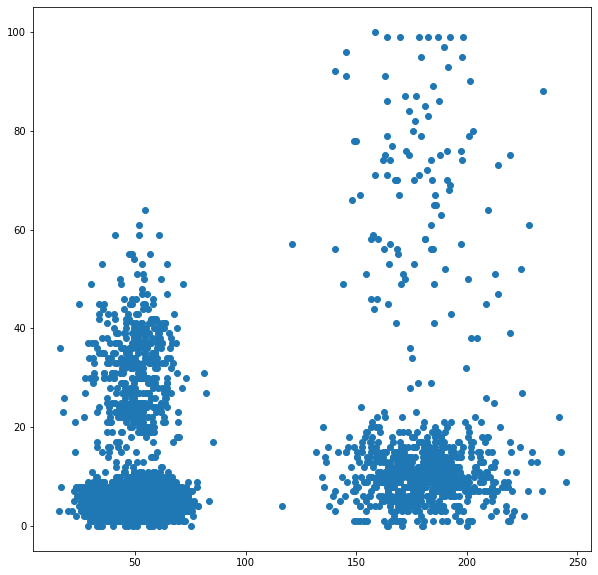

In [7]:
# data viz
fig, ax = plt.subplots(figsize = (10,10))
plt.scatter(driver_df["Distance_Feature"], driver_df["Speeding_Feature"])

**L2 Norm(most used)**

In [8]:
normalized_l2_df = pd.DataFrame(normalize(driver_df, norm="l2"), columns = driver_df.columns)
normalized_l2_df.head()

,Distance_Feature,Speeding_Feature
0,0.930694,0.365798
1,0.902956,0.429733
2,0.922526,0.385934
3,0.930058,0.367414
4,0.909165,0.416437


In [9]:
# check if actual norm of each row is == 1(unit norm) and store in df
normalized_l2_df["L2"] = normalized_l2_df["Distance_Feature"] * normalized_l2_df["Distance_Feature"] + \
        normalized_l2_df["Speeding_Feature"] * normalized_l2_df["Speeding_Feature"]

normalized_l2_df.head()

,Distance_Feature,Speeding_Feature,L2
0,0.930694,0.365798,1.0
1,0.902956,0.429733,1.0
2,0.922526,0.385934,1.0
3,0.930058,0.367414,1.0
4,0.909165,0.416437,1.0


***
**L1 Norm(# transforms data so sum of abs value of each vector should be equal to 1)**

In [10]:
normalized_l1_df = pd.DataFrame(normalize(driver_df, norm="l1"), columns = driver_df.columns)
normalized_l1_df.head()

,Distance_Feature,Speeding_Feature
0,0.717856,0.282144
1,0.677544,0.322456
2,0.705047,0.294953
3,0.716823,0.283177
4,0.685851,0.314149


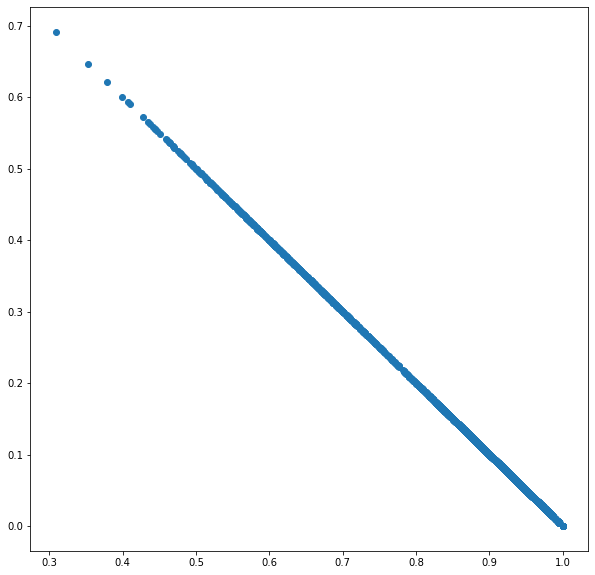

In [11]:
# data viz
fig, ax = plt.subplots(figsize = (10,10))
plt.scatter(normalized_l1_df["Distance_Feature"], normalized_l1_df["Speeding_Feature"])

In [12]:
# to confirm vectors have been scaled to have her values sum up to 1
normalized_l1_df["L1"] = normalized_l1_df["Distance_Feature"] + normalized_l1_df["Speeding_Feature"]

normalized_l1_df.head()

,Distance_Feature,Speeding_Feature,L1
0,0.717856,0.282144,1.0
1,0.677544,0.322456,1.0
2,0.705047,0.294953,1.0
3,0.716823,0.283177,1.0
4,0.685851,0.314149,1.0


**Max Norm(makes max value in feature vector to be == 1 and other is values are scaled)**

In [13]:
normalized_max_df = pd.DataFrame(normalize(driver_df, norm = "max"), columns = driver_df.columns)

normalized_max_df.head()

,Distance_Feature,Speeding_Feature
0,1.0,0.393038
1,1.0,0.475919
2,1.0,0.418345
3,1.0,0.395044
4,1.0,0.458043
